# PROBLEM 3 Yanis Tazi

# Q1

# I)

### 1. Adagrad : it adapts the learning rate to every parameter with small updates corresponding to low learning rate for high frequency features  and large updates corresponding to high learning rates for low frequency features . This is why , it has been mostly used to  deal with sparse data.
### $ W_{t+1,i} = W_{t,i} -  \frac{\eta}{\sqrt {{G_{t,ii}} +\epsilon}} g_{t,i}$.
### Considering $G_t$ as the diagonal matrix with the sum squares of past gradients with respect to all parameters W , we can have a vectorized implementation: $ W_{t+1} = W_{t} -  \frac{\eta}{\sqrt {{G_t} +\epsilon}} g_{t}$

### where the $W_{t,i}$ is the parameter i  at time step t, $\eta$ is the learning rate,  $\epsilon$ is a constant smoothing term to make sure we do not divide by zero, $g_{t,i}=\nabla_W J(W_{t,i})$ is the partial derivative of the loss with respect to $W_i$ at step t and $G_{t,ii}$ is the sum of the squares of the gradients with respect to $W_i$ up to step t 


### 2. RMSProp : it allows us to deal with the aggressive diminishing learning rates caused by Adagrad.
### $ W_{t+1} = W_{t} -  \frac{\eta}{\sqrt {E(g^2)_t +\epsilon}} g_{t}$, with $ E(g^2)_t= 0.9 E(g^2)_{t-1} + 0.1 g_t^2$, where $E(g^2)_t$ is the running average .

### 3. Adadelta : it is an extension of Adagrad attempting to deal with the aggressive diminishing learning rates caused by Adagrad. The idea is to use the sum of gradients recursively with a decay average formula. 
### $ W_{t+1} = W_{t} -  \frac{\eta}{\sqrt {E(g^2)_t +\epsilon}} g_{t}$, with $ E(g^2)_t= \gamma E(g^2)_{t-1} + (1-\gamma) g_t^2$, where $E(g^2)_t$ is the running average and $\gamma$ is the fraction given to the running average.


### 4. Adam : As the previous methods, Adam  also computes a learning rate for each of the features. In complement to the running average previously described, it also stores keeps an exponentially decaying average of past gradients in the same way as momentum in order to find flat minima.
### $ W_{t+1} = W_{t} -  \frac{\eta}{\sqrt {\hat{v_t}} +\epsilon} \hat{m_t}$, where $\hat{m_t}=\frac{m_t}{1-\beta_1^t}$ and $\hat{v_t}=\frac{v_t}{1-\beta_2^t}$.
### $m_t=\beta_1 m_{t-1} + (1-\beta_1)g_t$ and $m_t=\beta_2 v_{t-1} + (1-\beta_2)g_t^2$, that can be seen as the decaying averages of past gradients and squared past gradients i.e estimating mean and variance unscaled of the gradients.
### To sum up, it can be  viewed as a combination of both RMSProp and momentum.

### 5. Nadam :
###  $ W_{t+1} = W_{t} -  \frac{\eta}{\sqrt {\hat{v_t}} +\epsilon} (\beta_1\hat{m_t}\frac{(1-\beta_1) g_t}{1-\beta_1^t})$
### The idea here is to combine Adam with Nesterov accelerated gradient to have a more accurate step towards the direction of the gradient.

# II)

### Hyperparameters :
### Adagrad: $\eta, \epsilon$
### RMSprop: $\eta, \epsilon$
### Adadelta: $\eta, \epsilon, \gamma$
### Adam: $\eta, \beta_1,\beta_2,\epsilon$
### Nadam : $\eta, \beta_1,\beta_2,\epsilon$

# III)

### Adadelta removes the use of the learning rate parameter completely by replacing it with thth
### In summary, RMSprop is an extension of Adagrad that deals with its radically diminishing learning rates. It is identical to Adadelta, except that Adadelta uses the RMS of parameter updates in the numinator update rule. Adam, finally, adds bias-correction and momentum to RMSprop

# IV) 

### Nadam (nesterov-accelerated adaptive moment estimation) is simply the combination of Adam with Nestervov accelerated gradient.
### Adam however can be viewed as RMSProp and Nesterov momentum

# Q2

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
import tensorflow.keras as keras
from tensorflow.keras.layers import BatchNormalization, LayerNormalization
import tensorflow as tf
from tensorflow.keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
from matplotlib import pyplot
from tensorflow.keras.datasets import cifar10  
from numpy import save
from numpy import savetxt
from numpy import loadtxt
from time import time

/Users/taziy/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/taziy/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/taziy/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/taziy/anaconda3/lib/python3.7/site-packages/tensorboar

Please install GPU version of TF


In [2]:

# load dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


# Reshape the dataset into 1D array
dim_data = np.prod(x_train.shape[1:])

x_train = x_train.reshape(x_train.shape[0], dim_data)
x_test = x_test.reshape(x_test.shape[0], dim_data)


In [3]:
def create_model():
    tf.random.set_seed(17)

    #Model with 2 hidden layers and l2 regularization, relu activation

    model = Sequential()
    model.add(Dense(1000,input_shape=(dim_data,),  activation='relu',kernel_regularizer=keras.regularizers.l2()))
    model.add(Dense(1000, activation='relu',kernel_regularizer=keras.regularizers.l2()))
    model.add(Dense(10, activation='softmax',kernel_regularizer=keras.regularizers.l2()))
    return model



In [4]:

hist = []
training_time_q2 = []
val_q2 = []
for opt in ['Adagrad','RMSProp','Adadelta','Adam','Nadam']:
    model = create_model()
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
    start = time()   
    hist.append(model.fit(x=x_train,y=y_train, epochs=200, batch_size=128,  verbose=1))
    training_time_q2.append(time()-start)
    val_q2.append(model.evaluate(x_test,y_test))

Epoch 1/200
391/391 [==============================] - 3s 8ms/step - loss: 12.8399 - accuracy: 0.3116
Epoch 2/200
391/391 [==============================] - 3s 7ms/step - loss: 6.7911 - accuracy: 0.3751
Epoch 3/200
391/391 [==============================] - 3s 8ms/step - loss: 5.1031 - accuracy: 0.3948
Epoch 4/200
391/391 [==============================] - 3s 8ms/step - loss: 4.2582 - accuracy: 0.4073
Epoch 5/200
391/391 [==============================] - 3s 7ms/step - loss: 3.7417 - accuracy: 0.4117
Epoch 6/200
391/391 [==============================] - 3s 7ms/step - loss: 3.3898 - accuracy: 0.4179
Epoch 7/200
391/391 [==============================] - 3s 7ms/step - loss: 3.1366 - accuracy: 0.4227
Epoch 8/200
391/391 [==============================] - 3s 7ms/step - loss: 2.9424 - accuracy: 0.4251
Epoch 9/200
391/391 [==============================] - 3s 7ms/step - loss: 2.7913 - accuracy: 0.4299
Epoch 10/200
391/391 [==============================] - 3s 7ms/step - loss: 2.6701 - accur

In [5]:
training_time_q2 

[579.5734162330627,
 703.8594861030579,
 603.6786489486694,
 566.6453628540039,
 935.6838295459747]

In [6]:
training_loss = []
training_accuracy = []

for i in range(5):
    training_loss.append(hist[i].history['loss'])
    training_accuracy.append(hist[i].history['accuracy'])

In [7]:
savetxt('training_loss.csv', training_loss, delimiter=',')
savetxt('val_q2.csv', val_q2, delimiter=',')
#data = loadtxt('training_loss.csv', delimiter=',')

In [12]:
training_loss = loadtxt('training_loss.csv', delimiter=',')

In [15]:
training_loss[1]

array([3.92019343, 2.14718223, 2.11101246, 2.08563709, 2.06057215,
       2.03478193, 2.02088022, 2.0112958 , 2.00576448, 2.0015204 ,
       2.0035007 , 2.00031781, 1.9981488 , 1.99942529, 1.99898052,
       1.99563861, 1.99571621, 1.99584568, 1.994488  , 1.99001324,
       1.99094856, 1.98883784, 1.98922646, 1.99290919, 1.98763525,
       1.98886395, 1.98959482, 1.9892112 , 1.98862004, 1.98878145,
       1.98451591, 1.98651803, 1.98583925, 1.98602831, 1.98708129,
       1.98608506, 1.98654234, 1.98524439, 1.98610687, 1.98510468,
       1.98552239, 1.98747277, 1.98624623, 1.98427689, 1.98537779,
       1.98556316, 1.98442948, 1.98399329, 1.98543346, 1.98610353,
       1.9845016 , 1.98544824, 1.98660064, 1.98412895, 1.9858247 ,
       1.98357081, 1.9858638 , 1.98425591, 1.98424768, 1.98416543,
       1.98257411, 1.98465753, 1.98364925, 1.98477435, 1.98319042,
       1.98427498, 1.98096621, 1.983091  , 1.98314691, 1.98326707,
       1.98586214, 1.98102283, 1.98547423, 1.98063052, 1.98463

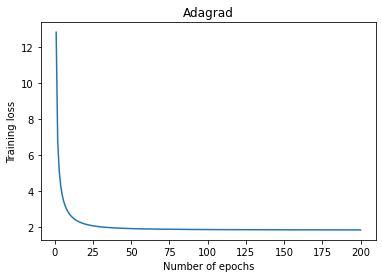

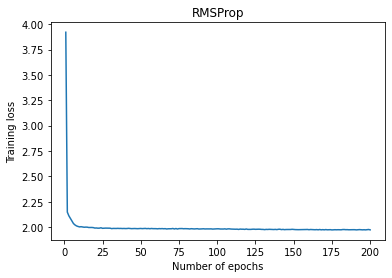

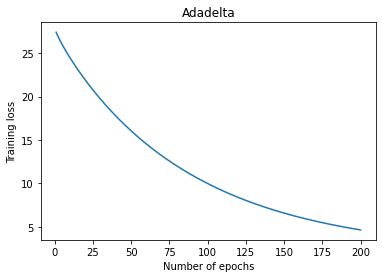

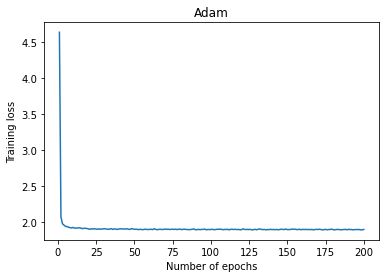

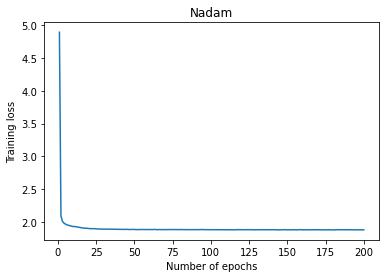

In [32]:
training_loss = loadtxt('training_loss.csv', delimiter=',')
title=["Adagrad","RMSProp","Adadelta","Adam","Nadam"]
for i in range(5) :
    plt.plot(range(1,201),training_loss[i])
    plt.title (title[i])
    plt.xlabel("Number of epochs")
    plt.ylabel("Training loss")
    plt.show()

### Lowest training loss at 200 epochs : Adagrad

In [35]:
print("Training loss for each method :","\n")
for i in range(5):
    print(title[i],training_loss[i][199])


Training loss for each method : 

Adagrad 1.8195613622665405
RMSProp 1.9723318815231323
Adadelta 4.638694763183594
Adam 1.8989620208740234
Nadam 1.8815386295318604


# Q3)

In [3]:
def create_model_dropout():
    tf.random.set_seed(17)

    #Model with 2 hidden layers and l2 regularization, relu activation and dropout

    model = Sequential()
    model.add(Dropout(0.2, input_shape=(dim_data,)))
    model.add(Dense(1000,  activation='relu',kernel_regularizer=keras.regularizers.l2()))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='relu',kernel_regularizer=keras.regularizers.l2()))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax',kernel_regularizer=keras.regularizers.l2()))
    return model



In [4]:

hist = []
training_time_q3 = []
val_q3 = []
for opt in ['Adagrad','RMSProp','Adadelta','Adam','Nadam']:
    model = create_model_dropout()
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
    start = time()    
    hist.append(model.fit(x=x_train,y=y_train, epochs=200, batch_size=128,verbose=1))
    training_time_q3.append(time()-start)
    val_q3.append(model.evaluate(x_test,y_test))

Epoch 1/200
391/391 [==============================] - 3s 8ms/step - loss: 14.7377 - accuracy: 0.2381
Epoch 2/200
391/391 [==============================] - 3s 7ms/step - loss: 8.1977 - accuracy: 0.3045
Epoch 3/200
391/391 [==============================] - 3s 8ms/step - loss: 6.0756 - accuracy: 0.3277
Epoch 4/200
391/391 [==============================] - 3s 8ms/step - loss: 4.9703 - accuracy: 0.3420
Epoch 5/200
391/391 [==============================] - 3s 7ms/step - loss: 4.2902 - accuracy: 0.3523
Epoch 6/200
391/391 [==============================] - 3s 7ms/step - loss: 3.8295 - accuracy: 0.3602
Epoch 7/200
391/391 [==============================] - 3s 8ms/step - loss: 3.4939 - accuracy: 0.3669
Epoch 8/200
391/391 [==============================] - 3s 8ms/step - loss: 3.2433 - accuracy: 0.3719
Epoch 9/200
391/391 [==============================] - 3s 7ms/step - loss: 3.0473 - accuracy: 0.3768
Epoch 10/200
391/391 [==============================] - 3s 7ms/step - loss: 2.8892 - accur

In [6]:
training_loss_q3 = []
training_accuracy_q3 = []

for i in range(5):
    training_loss_q3.append(hist[i].history['loss'])
    training_accuracy_q3.append(hist[i].history['accuracy'])

In [7]:
savetxt('training_loss_q3.csv', training_loss_q3, delimiter=',')

savetxt('val_q3.csv', val_q3, delimiter=',')


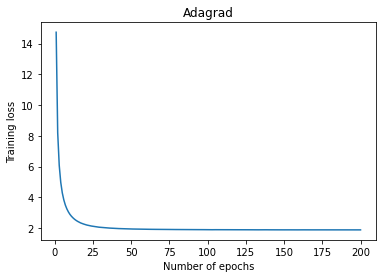

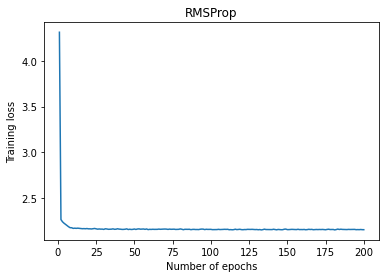

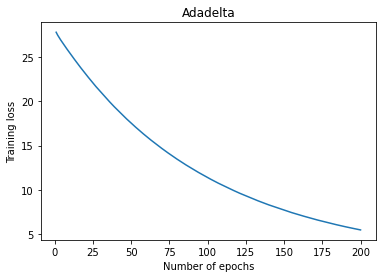

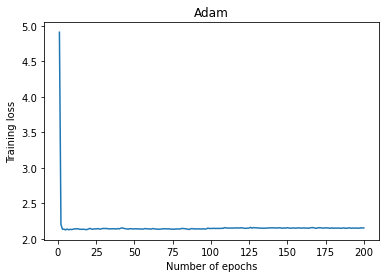

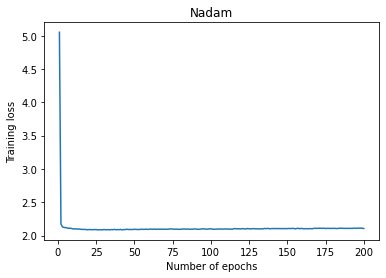

In [36]:
training_loss_q3 = loadtxt('training_loss_q3.csv', delimiter=',')
title=["Adagrad","RMSProp","Adadelta","Adam","Nadam"]
for i in range(5) :
    plt.plot(range(1,201),training_loss_q3[i])
    plt.title (title[i])
    plt.xlabel("Number of epochs")
    plt.ylabel("Training loss")
    plt.show()

### Lowest training loss at 200 epochs is again Adagrad when we perform dropout . Interestingly, it seems that the dropout slightly decreased the performance in the training. We will see in q4 if this is because it prevents overfitting when we will evaluate on the test accuracy.

In [37]:
print("Training loss for each method :","\n")
for i in range(5):
    print(title[i],training_loss_q3[i][199])


Training loss for each method : 

Adagrad 1.8797223567962646
RMSProp 2.1566853523254395
Adadelta 5.511438846588135
Adam 2.1543853282928467
Nadam 2.106313943862915


# Comparison of the training times :

# Training time with dropout for Adagrad, RMSProp, Adadelta, Adam, Nadam (in order) :

In [5]:
training_time_q3

[595.7203233242035,
 727.5254926681519,
 626.3900682926178,
 590.7172820568085,
 943.4767484664917]

# Training time without dropout for Adagrad, RMSProp, Adadelta, Adam, Nadam (in order) :

In [5]:
training_time_q2 

[579.5734162330627,
 703.8594861030579,
 603.6786489486694,
 566.6453628540039,
 935.6838295459747]

# It is consistent with what has been shown in the litterature : Indeed, dropout increases training time !

# Q4)

In [40]:
val_q2 = loadtxt('val_q2.csv', delimiter=',')
val_q3 = loadtxt('val_q3.csv', delimiter=',')

In [47]:
print("Test accuracy of trained models for all the five methods:","\n")
for i in range(5):
    print(title[i],"           without dropout : ",val_q2[i][1],"     //// with droupout : ",val_q3[i][1])

Test accuracy of trained models for all the five methods: 

Adagrad            without dropout :  0.4731000065803528      //// with droupout :  0.448199987411499
RMSProp            without dropout :  0.33379998803138733      //// with droupout :  0.28690001368522644
Adadelta            without dropout :  0.43709999322891235      //// with droupout :  0.39980000257492065
Adam            without dropout :  0.38089999556541443      //// with droupout :  0.24789999425411224
Nadam            without dropout :  0.3806000053882599      //// with droupout :  0.2849999964237213
